In [ ]:
# Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

##Question 1##
This condition is equivalent to: with probability $\geq 1-0.05, |E_{in} - E_{out}| < \Omega(N, H, \delta)$ where we have:
$$\Omega(N, H, \delta) = \sqrt{\frac{8}{N}\ln{\frac{4m_{\mathscr{H}}(2N)}{\delta}}}\leq \sqrt{\frac{8}{N}\ln{\frac{4\times (2N)^{10}}{\delta}}}= 0.05$$
We can solve for $N$ numerically using the following code:




In [ ]:
def Omega(N):
  return np.sqrt((8/N) * np.log((4 * (2 * N) ** 10)/0.05)) - 0.05

numerical_approx = sp.optimize.fsolve(Omega, 1)
print("The required numerical approximation is approximately:", round(float(numerical_approx)))

The required numerical approximation is approximately: 452957


As we can see, the numerical approximation value is about $452957$, which is closest to $460000$.  
Therefore, the answer to question $1$ is **[d]**.

##Question 2 - 3##

(0.0, 10000.0)

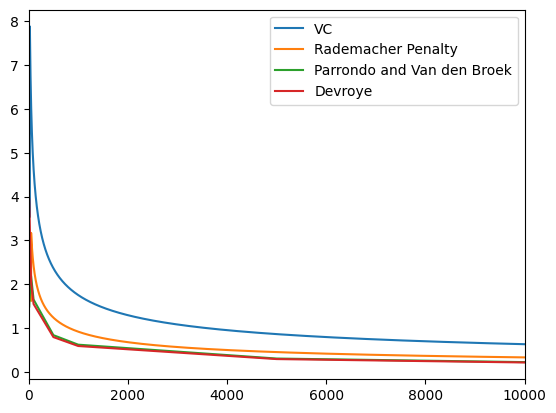

In [ ]:
d_vc = 50
delta = 0.05

def vc_bound(N):
  if N>25:
    return np.sqrt((8/N) * np.log((4 * (2 * N) ** d_vc)/delta))
  else:
    return np.sqrt((8/N) * np.log((4 * 2 ** (2 * N))/delta))

def rp_bound(N):
  if N > 50:
    N = float(N)
    return np.sqrt((2 * np.log(2 * N * (N ** d_vc)))/N) + np.sqrt((2/N) * np.log(1/delta)) + 1/N
  else:
    return np.sqrt((2 * np.log(2 * N * (2 ** N)))/N) + np.sqrt((2/N) * np.log(1/delta)) + 1/N

def pv_broek(pair):
  if pair[0]> 25:
    return np.sqrt((1/pair[0]) * (2 * pair[1] + np.log((6 * (2 * pair[0]) ** d_vc)/delta)))
  else:
    return np.sqrt((1/pair[0]) * (2 * pair[1] + np.log((6 * 2 ** (2 * pair[0]))/delta)))

def devroye(pair):
  if pair[0] ** 2 > 50:
    return np.sqrt((1/(2 * pair[0])) * (4 * pair[1] * (1 + pair[1])+ np.log(4) + (2 * d_vc) * np.log(pair[0]) - np.log(delta)))
  else:
    return np.sqrt((1/(2 * pair[0])) * (4 * pair[1] * (1 + pair[1])+ np.log(4) + (pair[0] ** 2) * np.log(2) - np.log(delta)))

vc_y = []
rp_y = []
for i in range(1,10001):
  vc_y.append(vc_bound(i))
  rp_y.append(rp_bound(i))


plt.plot(np.linspace(1,10000,10000), vc_y, label="VC")
plt.plot(np.linspace(1,10000,10000), rp_y, label="Rademacher Penalty")

pv_points = []
devroye_points = []

for N in [5, 10, 50, 100, 500, 1000, 5000, 10000]:
  eps = 1
  previous_eps = 0
  while eps != previous_eps:
    previous_eps = eps
    eps = pv_broek([N, previous_eps])
  pv_points.append([N, eps])
pv_points = np.array(pv_points)

for N in [5, 10, 50, 100, 500, 1000, 5000, 10000]:
  eps = 1
  previous_eps = 0
  while eps != previous_eps:
    previous_eps = eps
    eps = devroye([N, previous_eps])
  devroye_points.append([N, eps])
devroye_points = np.array(devroye_points)

plt.plot(pv_points[:,0], pv_points[:,1], label = "Parrondo and Van den Broek")
plt.plot(devroye_points[:,0], devroye_points[:,1], label = "Devroye")
plt.legend()
plt.xlim(0,10000)

In [ ]:
def solve_pv(N):
  eps = 1
  previous_eps = 0
  while eps != previous_eps:
    previous_eps = eps
    eps = pv_broek([N, previous_eps])
  return eps
def solve_devroye(N):
  eps = 1
  previous_eps = 0
  while eps != previous_eps:
    previous_eps = eps
    eps = devroye([N, previous_eps])
  return eps
# When N is large
N = 10000
bound = [vc_bound(N), rp_bound(N), solve_pv(N), solve_devroye(N)]
print("For large N (N = 10000):")
print("VC Bound:", bound[0], "\nRademacher Penalty Bound:", bound[1], "\nParrondo and Van den Broek:", bound[2], "\nDevroye:", bound[3])
# When N is small
N = 5
bound = [vc_bound(N), rp_bound(N), solve_pv(N), solve_devroye(N)]
print("For small N (N = 5):")
print("VC Bound:", bound[0], "\nRademacher Penalty Bound:", bound[1], "\nParrondo and Van den Broek:", bound[2], "\nDevroye:", bound[3])

For large N (N = 10000):
VC Bound: 0.632174915200836 
Rademacher Penalty Bound: 0.3313087859616395 
Parrondo and Van den Broek: 0.22369829368078561 
Devroye: 0.21522804980824667
For small N (N = 5):
VC Bound: 4.254597220000659 
Rademacher Penalty Bound: 2.813654929686762 
Parrondo and Van den Broek: 1.74395359699581 
Devroye: 2.2645407628679917


Hence, from the simulation result, we can see that when $N$ is large, the Devroye bound is the smallest.  
Therefore, the answer to question $2$ is **[d]**.  
And when $N$ is small, the Parrondo and Van den Broek bound is the smallest.  
Therefore, the answer to question $3$ is **[c]**.


##Question 4##


In [ ]:
a = 0
for i in range(10000):
  x = np.random.uniform(-1, 1, 2)
  y = np.sin(np.pi * x)

  reg_mat = np.c_[np.zeros(2), x]
  a += np.linalg.lstsq(reg_mat, y, rcond=None)[0][1]

a_tilde = a/10000
print("The approximated a =", round(a_tilde, 2))


The approximated a = 1.43


Therefore, from the approximation above, we can concldue that none of the options given is an exact match of the approximation.  
Hence, the answer to question $4$ is **[e]**.


##Question 5 - 7##
Here for bias $b$, we have the following:
$$X\sim Uni[-1,1], f(x)=\frac{1}{2}, b = \mathbb{E}_X((\overline{g}(x)-f(x))^2)$$
$$b = ∫_{-1}^{1}\frac{1}{2}(1.43x - \sin(\pi x))^2  dx \approx 0.271 \approx 0.3$$  
Hence, the answer to question $5$ is **[b]**.

And for variance $v$, we can approximate it by the following code:


In [ ]:
difference_squared = 0
for i in range(10000):
  x = np.random.uniform(-1, 1, 2)
  y = np.sin(np.pi * x)

  reg_mat = np.c_[np.zeros(2), x]
  a = np.linalg.lstsq(reg_mat, y, rcond=None)[0][1]
  difference_squared += (a - 1.43) ** 2

difference_mean = difference_squared/10000
expected_func = lambda x: (1/2) * difference_mean * (x ** 2)

v = sp.integrate.quad(expected_func, -1, 1)[0]
print("Variance =", v, "which is approximately", round(v,1))


Variance = 0.23590446592087608 which is approximately 0.2


Hence, from the approximation, we can conclude that the variance is around $0.2$.  
Thus, the answer to question $6$ is **[a]**.  
Lastly, we will compare the expected $E_{out}$ for each function given.  
The following expected $E_{out}$ are given in the lecture:
$$h(x) = b, \mathbb{E}(E_{out})=0.5 + 0.25 = 0.75$$
$$h(x) = ax + b, \mathbb{E}(E_{out})=0.21 + 1.69 = 1.9$$
And from our previous simulation, we get the following:
$$h(x) = ax, \mathbb{E}(E_{out}) = b + v = 0.271 + 0.2 = 0.471$$
The out-of-sample-errors of $h(x)=ax^2$ and $h(x)=ax^2+b$ can be given be the following code:




In [ ]:
def poly_origin(x, a):
  return a * (x ** 2)
def poly_b(x, a, b):
  return a * (x ** 2) + b


origin_para = 0
poly_a = 0
poly_const = 0

# Get the "average"

for i in range(10000):
  x = np.random.uniform(-1, 1, 2)
  y = np.sin(np.pi * x)
  origin_para += sp.optimize.curve_fit(poly_origin, x, y)[0][0]
  poly_para = sp.optimize.curve_fit(poly_b, x, y)[0]
  poly_a += poly_para[0]
  poly_const += poly_para[1]

avg_origin = origin_para/10000
avg_a = poly_a/10000
avg_b = poly_const/10000

# Bias

b_func = lambda x: (1/2) * ((avg_origin * (x ** 2))-np.sin(np.pi * x))**2
b_origin = sp.integrate.quad(b_func, -1, 1)[0]
print("Bias of y = ax^2:", b_origin)
b_func_poly = lambda x: (1/2) * ((avg_a * (x ** 2)) + (avg_b) -np.sin(np.pi * x))**2
b_poly = sp.integrate.quad(b_func_poly, -1, 1)[0]
print("Bias of y = ax^2 + b:", b_poly)

# Variance
diff_origin_squared = 0
diff_a_squared = 0
diff_b_squared = 0
diff_mid_squared = 0
for j in range(10000):
  x = np.random.uniform(-1, 1, 2)
  y = np.sin(np.pi * x)
  origin_a = sp.optimize.curve_fit(poly_origin, x, y)[0][0]
  diff_origin_squared += (origin_a - avg_origin) ** 2
  poly_para_diff = sp.optimize.curve_fit(poly_b, x, y)[0]
  poly_a_diff = poly_para_diff[0]
  poly_b_diff = poly_para_diff[1]
  diff_a_squared += (poly_a_diff - avg_a) ** 2
  diff_b_squared += (poly_b_diff - avg_b) ** 2
  diff_mid_squared += 2 * (poly_a_diff - avg_a) * (poly_b_diff - avg_b)

mean_diff_origin = diff_origin_squared/10000
expected_origin = lambda x: (1/2) * (mean_diff_origin) * (x ** 4)
var_origin = sp.integrate.quad(expected_origin, -1, 1)[0]
print("Variance of y = ax^2:", var_origin)
mean_diff_a = diff_a_squared/10000
mean_diff_b = diff_b_squared/10000
mean_diff_mid = diff_mid_squared/10000
expected_ab = lambda x: (1/2) * (mean_diff_a * (x ** 4) + mean_diff_mid * (x ** 2) + mean_diff_b)
var_ab = sp.integrate.quad(expected_ab, -1, 1)[0]
print("Variance of y = ax^2 + b:", var_ab)

Bias of y = ax^2: 0.500044397556419
Bias of y = ax^2 + b: 1.2111215508635886
Variance of y = ax^2: 10.883935418084507
Variance of y = ax^2 + b: 645259.686694879


From the results above, we can clearly see that the out-of-sample error (bias + variance) of $h(x)=ax^2$ and $h(x)=ax^2+b$ is much higher than the linear hypotheses (Also for $h(x)=ax^2+b$ the result is highly unstable).   
Therefore, with all the hypotheses considered, we can conclude that the hypothesis with the smallest expected out-of-sample-error is $h(x)=ax$.  
Hence, the answer to question $7$ is **[b]**.

##Question 8##


Let $Nℭq$ denotes the binomial coefficient of the following

\begin{pmatrix}
N\\q
\end{pmatrix}

Since we have:
$$m_{\mathscr{H}}(N+1) = 2\cdot m_{\mathscr{H}}(N) + (N)ℭq$$
And
$$\forall N\leq d_{VC},m_{\mathscr{H}}(N) = 2^N$$
We can conclude that
$$m_{\mathscr{H}}(N+1) = 2^{N + 1} \iff N + 1 \leq d_{VC} \iff (N)ℭq = 0$$
For $(N)ℭq = 0$ we need $q \geq N + 1$, which is $N\leq q - 1$. Hence, for $N + 1$ to be the first break point, we need $(N)ℭq \neq 0$, which implies $N\geq q$, and the smallest such $N$ is just $q$. In this case, since $N+1$ is the first break point, we can conclude that $N=q$ is the VC dimension, i.e. $N=q=d_{VC}$.

Therefore, the answer to question $8$ is **[c]**.


##Question 9##
The VC dimension of a hypothesis set is just the maximum points that can be shattered by the set. Hence, in this situation, if the intersection $⋂_{k = 1}^{K}\mathscr{H}_k=∅$, then the VC dimension $d_{VC}(⋂_{k = 1}^{K}\mathscr{H}_k)$ is just $0$ by the rule given in the question. Hence, the lower bound is $0$. $\min\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K}$ is not a lower bound because it didn't consider the situation where the intersection is empty.   
When it comes to the upper bound, since the intersection contains all funcntions that appear in all the set, its VC dimension cannot exceed $\min\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K}$ because all candidate functions in the intersection are in the hypothesis set that gives the minimum $d_{VC}$. And this is the smallest upper bound of all the given ones as
$$\min\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K} \leq \max\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K} \leq \sum_{k = 1}^{K}d_{VC}(\mathscr{H}_k)$$
Therefore, the answer to question $9$ is **[b]**.

##Question 10##
The lower bound of $d_{VC}(\bigcup_{k = 1}^{K}\mathscr{H}_k)$ is $\max\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K}$ because every candidate function in the hypothesis that gives the maximum $d_{VC}$ is in $\bigcup_{k = 1}^{K}\mathscr{H}_k$ since this is the union of all hypothesis sets. Just like what we have above, we have:
$$0\leq \min\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K} \leq \max\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K})$$
Since we want the tightest range, we choose $\max\{d_{VC}(\mathscr{H}_k)\}_{k = 1}^{K}$ to be the lower bound.  
Hence, the answer to question $10$ is either **[d]** or **[e]**.